In [1]:
# Importing the data and libraries
import pandas as pd
import matplotlib.pyplot as plt

predictive_modelling_df = pd.read_csv("df.csv")

predictive_modelling_df.head()

,user_id,platform,network,country,age,time_spend,coin_spend,coin_earn,level_success,level_fail,level_start,booster_spend,booster_earn,coin_amount,event_participate,shop_open,d30_revenue
0,dlxsqb7178890300b2,ios,Oyster,Zephyra,53,71,0,0,0,0,0,0,0,2000,0,0.0,0.0
1,dlxsqb7178884891b2,ios,Piggy,Thalassia,33,88,0,0,0,0,0,0,0,2000,0,0.0,0.0
2,dlxsqb7179152264b2,ios,Piggy,Sunridge,64,2,0,0,0,0,0,0,0,2000,0,0.0,0.0
3,dlxsqb7179044724b2,ios,Piggy,Zephyra,51,11,0,0,0,0,0,0,0,2000,0,0.0,0.0
4,dlxsqb7178985060b2,ios,Piggy,Zephyra,70,38,0,0,0,0,0,0,0,2000,0,0.0,0.0


In [2]:
# Examine the df
predictive_modelling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342519 entries, 0 to 342518
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_id            342519 non-null  object 
 1   platform           342519 non-null  object 
 2   network            342519 non-null  object 
 3   country            342519 non-null  object 
 4   age                342519 non-null  int64  
 5   time_spend         342519 non-null  int64  
 6   coin_spend         342519 non-null  int64  
 7   coin_earn          342519 non-null  int64  
 8   level_success      342519 non-null  int64  
 9   level_fail         342519 non-null  int64  
 10  level_start        342519 non-null  int64  
 11  booster_spend      342519 non-null  int64  
 12  booster_earn       342519 non-null  int64  
 13  coin_amount        342519 non-null  int64  
 14  event_participate  342519 non-null  int64  
 15  shop_open          342519 non-null  float64
 16  d3

### Data Pre-Processing

In [3]:
# Dropping user_id column, it is irrelevant 
predictive_modelling_df.drop(columns=["user_id"], inplace=True)

In [4]:
predictive_modelling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342519 entries, 0 to 342518
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   platform           342519 non-null  object 
 1   network            342519 non-null  object 
 2   country            342519 non-null  object 
 3   age                342519 non-null  int64  
 4   time_spend         342519 non-null  int64  
 5   coin_spend         342519 non-null  int64  
 6   coin_earn          342519 non-null  int64  
 7   level_success      342519 non-null  int64  
 8   level_fail         342519 non-null  int64  
 9   level_start        342519 non-null  int64  
 10  booster_spend      342519 non-null  int64  
 11  booster_earn       342519 non-null  int64  
 12  coin_amount        342519 non-null  int64  
 13  event_participate  342519 non-null  int64  
 14  shop_open          342519 non-null  float64
 15  d30_revenue        342519 non-null  float64
dtypes:

In [5]:
# Examine the object type columns

object_columns = predictive_modelling_df.select_dtypes(include=['object'])
unique_counts = object_columns.nunique()

print(object_columns.nunique())

platform     2
network     14
country     20
dtype: int64


The platform column contained only two unique values, one-hot encoding was applied. However, the network and country columns, containing 14 and 20 unique values, respectively, were encoded using label encoding.

In [6]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Apply One-Hot Encoding to platform
ohe_columns = ["platform"]

# Apply Label Encoding to network and country
label_columns = ["network", "country"]

# One-Hot Encoding 
ohe = OneHotEncoder(sparse_output=False, drop='first')  #
ohe_df = pd.DataFrame(ohe.fit_transform(predictive_modelling_df[ohe_columns]), 
                      columns=ohe.get_feature_names_out(ohe_columns))

# Label Encoding
label_encoders = {}
for col in label_columns:
    le = LabelEncoder()
    predictive_modelling_df[col] = le.fit_transform(predictive_modelling_df[col])
    label_encoders[col] = le 

In [7]:
predictive_modelling_df.drop(columns=ohe_columns, inplace=True)
predictive_modelling_df = pd.concat([predictive_modelling_df, ohe_df], axis=1)

In [8]:
predictive_modelling_df.head()

,network,country,age,time_spend,coin_spend,coin_earn,level_success,level_fail,level_start,booster_spend,booster_earn,coin_amount,event_participate,shop_open,d30_revenue,platform_ios
0,10,19,53,71,0,0,0,0,0,0,0,2000,0,0.0,0.0,1.0
1,11,17,33,88,0,0,0,0,0,0,0,2000,0,0.0,0.0,1.0
2,11,16,64,2,0,0,0,0,0,0,0,2000,0,0.0,0.0,1.0
3,11,19,51,11,0,0,0,0,0,0,0,2000,0,0.0,0.0,1.0
4,11,19,70,38,0,0,0,0,0,0,0,2000,0,0.0,0.0,1.0


In [9]:
predictive_modelling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342519 entries, 0 to 342518
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   network            342519 non-null  int32  
 1   country            342519 non-null  int32  
 2   age                342519 non-null  int64  
 3   time_spend         342519 non-null  int64  
 4   coin_spend         342519 non-null  int64  
 5   coin_earn          342519 non-null  int64  
 6   level_success      342519 non-null  int64  
 7   level_fail         342519 non-null  int64  
 8   level_start        342519 non-null  int64  
 9   booster_spend      342519 non-null  int64  
 10  booster_earn       342519 non-null  int64  
 11  coin_amount        342519 non-null  int64  
 12  event_participate  342519 non-null  int64  
 13  shop_open          342519 non-null  float64
 14  d30_revenue        342519 non-null  float64
 15  platform_ios       342519 non-null  float64
dtypes:

New columns are to be added to the dataset through feature engineering before dealing with the target column.

### Feature Engineering

Added cols:

Level Completion Rate (level_completion_rate) → Measures how often players successfully complete levels, indicating skill or difficulty.

Average Session Time (avg_session_time) → Shows how long players stay engaged per session.

Coin Spend Ratio (coin_spend_ratio) → Indicates spending behavior by comparing coins spent vs. earned.

Booster Usage Ratio (booster_usage_ratio) → Reveals how often players rely on boosters to progress.

In [10]:
# Calculate Level Completion Rate
predictive_modelling_df['level_completion_rate'] = predictive_modelling_df['level_success'] / (
    predictive_modelling_df['level_success'] + predictive_modelling_df['level_fail']
)

# Calculate Average Session Time
predictive_modelling_df['avg_session_time'] = predictive_modelling_df['time_spend'] / (predictive_modelling_df['level_start'] + 1)

# Calculate Coin Spend Ratio
predictive_modelling_df['coin_spend_ratio'] = predictive_modelling_df['coin_spend'] / (
    predictive_modelling_df['coin_spend'] + predictive_modelling_df['coin_earn']
)

# Calculate Booster Usage Ratio
predictive_modelling_df['booster_usage_ratio'] = predictive_modelling_df['booster_spend'] / (
    predictive_modelling_df['booster_earn'] + 1
)

# Replace NaN values with 0 (to prevent division errors)
predictive_modelling_df.fillna(0, inplace=True)

In [11]:
predictive_modelling_df.head()

,network,country,age,time_spend,coin_spend,coin_earn,level_success,level_fail,level_start,booster_spend,booster_earn,coin_amount,event_participate,shop_open,d30_revenue,platform_ios,level_completion_rate,avg_session_time,coin_spend_ratio,booster_usage_ratio
0,10,19,53,71,0,0,0,0,0,0,0,2000,0,0.0,0.0,1.0,0.0,71.0,0.0,0.0
1,11,17,33,88,0,0,0,0,0,0,0,2000,0,0.0,0.0,1.0,0.0,88.0,0.0,0.0
2,11,16,64,2,0,0,0,0,0,0,0,2000,0,0.0,0.0,1.0,0.0,2.0,0.0,0.0
3,11,19,51,11,0,0,0,0,0,0,0,2000,0,0.0,0.0,1.0,0.0,11.0,0.0,0.0
4,11,19,70,38,0,0,0,0,0,0,0,2000,0,0.0,0.0,1.0,0.0,38.0,0.0,0.0


In [12]:
predictive_modelling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342519 entries, 0 to 342518
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   network                342519 non-null  int32  
 1   country                342519 non-null  int32  
 2   age                    342519 non-null  int64  
 3   time_spend             342519 non-null  int64  
 4   coin_spend             342519 non-null  int64  
 5   coin_earn              342519 non-null  int64  
 6   level_success          342519 non-null  int64  
 7   level_fail             342519 non-null  int64  
 8   level_start            342519 non-null  int64  
 9   booster_spend          342519 non-null  int64  
 10  booster_earn           342519 non-null  int64  
 11  coin_amount            342519 non-null  int64  
 12  event_participate      342519 non-null  int64  
 13  shop_open              342519 non-null  float64
 14  d30_revenue            342519 non-nu

Based on domain expertise, it was determined that all existing rows in the dataset were relevant to the task. Statistical analyses such as correlation, which indicate relationships rather than causation, were not applied due to concerns that they could be misleading.

Target Column

In [13]:
# Examine the target column (d30_revenue_binary)
predictive_modelling_df['d30_revenue'].describe()

count    342519.000000
mean          7.914432
std          91.520370
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       11071.190000
Name: d30_revenue, dtype: float64

Mean is 7.91 and max is 11071. However, a binary target column is needed because this is a classification case

In [14]:
# Target column is transformed into binary

# Convert the target column to binary (1 if greater than 0, else 0)
predictive_modelling_df['d30_revenue_binary'] = (predictive_modelling_df['d30_revenue'] > 0).astype(int)

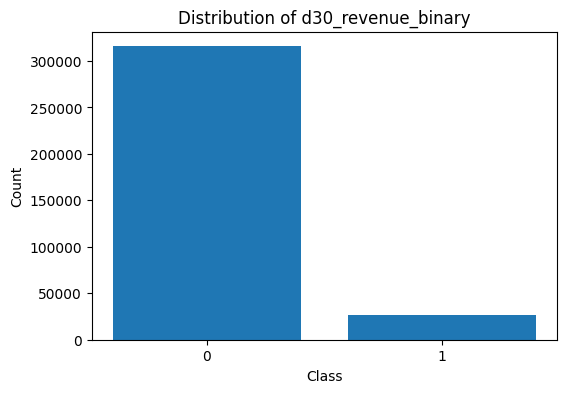

In [15]:
# Re-Examine the target column

# Count occurrences of each class (0 and 1)
class_counts = predictive_modelling_df['d30_revenue_binary'].value_counts()

# Plot a bar chart for class distribution
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, tick_label=['0', '1'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of d30_revenue_binary')
plt.show()

In [16]:
# Re-Examine the target column

class_counts

d30_revenue_binary
0    315683
1     26836
Name: count, dtype: int64

In [17]:
# Re-Examine the target column

# Count occurrences of each class (0 and 1)
class_counts = predictive_modelling_df['d30_revenue_binary'].value_counts()

# Compute the ratio of 0s to 1s
zero_to_one_ratio = class_counts[0] / class_counts[1]

# Print the ratio
print(f"Ratio of 0s to 1s: {zero_to_one_ratio:.2f}")

Ratio of 0s to 1s: 11.76


The number of 0s in the target column is significantly higher than the number of 1s. Different ML approaches were tried to address this imbalance.

### Predictive Models

First, The data is divided into training and test sets using a stratified approach. A simple model is trained on the original training set, without any resampling or special weighting. Accuracy, precision, recall, F1, ROC AUC, and PR AUC will be measured to serve as baseline metrics.

In [18]:
df_clean = predictive_modelling_df.drop(columns=["d30_revenue"])  # remove target col

# Separate features (X) and target (y)
X = df_clean.drop(columns=["d30_revenue_binary"])
y = df_clean["d30_revenue_binary"]

# Train-Test Split (with stratification)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

Then:

1-) Baseline Model Training: A simple RandomForestClassifier is trained on the original training set (no resampling). Evaluated using standard classification metrics.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score

# Train the baseline Random Forest (no SMOTE)
rf_baseline = RandomForestClassifier(random_state=42, n_estimators=100)
rf_baseline.fit(X_train, y_train)

# Prediction 
y_pred_baseline = rf_baseline.predict(X_test)
y_prob_baseline = rf_baseline.predict_proba(X_test)[:, 1]  # for ROC AUC & PR AUC

# Evaluation (Precision, Recall, F1, ROC AUC, PR AUC)
print("=== Baseline RandomForest (No SMOTE) ===")
print(classification_report(y_test, y_pred_baseline))

roc_baseline = roc_auc_score(y_test, y_prob_baseline)
pr_baseline = average_precision_score(y_test, y_prob_baseline)

print(f"ROC AUC: {roc_baseline:.4f}")
print(f"PR AUC: {pr_baseline:.4f}")

=== Baseline RandomForest (No SMOTE) ===
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     63137
           1       0.75      0.17      0.28      5367

    accuracy                           0.93     68504
   macro avg       0.84      0.58      0.62     68504
weighted avg       0.92      0.93      0.91     68504

ROC AUC: 0.8412
PR AUC: 0.4235


2-) SMOTE is applied only to the training set to handle class imbalance, and then the same RandomForest model re-trained. New metrics and baseline are compared.

In [20]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the TRAIN set only
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print("Original training label distribution:")
print(y_train.value_counts())
print("\nResampled training label distribution (SMOTE):")
print(y_train_sm.value_counts())

# Retrain RandomForest on SMOTE-resampled data
rf_smote = RandomForestClassifier(random_state=42, n_estimators=100)
rf_smote.fit(X_train_sm, y_train_sm)

# Prediction 
y_pred_smote = rf_smote.predict(X_test)
y_prob_smote = rf_smote.predict_proba(X_test)[:, 1]

# Evaluation (Precision, Recall, F1, ROC AUC, PR AUC)
print("\n=== RandomForest with SMOTE ===")
print(classification_report(y_test, y_pred_smote))

roc_smote = roc_auc_score(y_test, y_prob_smote)
pr_smote = average_precision_score(y_test, y_prob_smote)

print(f"ROC AUC: {roc_smote:.4f}")
print(f"PR AUC: {pr_smote:.4f}")

Original training label distribution:
d30_revenue_binary
0    252546
1     21469
Name: count, dtype: int64

Resampled training label distribution (SMOTE):
d30_revenue_binary
0    252546
1    252546
Name: count, dtype: int64

=== RandomForest with SMOTE ===
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     63137
           1       0.39      0.29      0.34      5367

    accuracy                           0.91     68504
   macro avg       0.67      0.63      0.64     68504
weighted avg       0.90      0.91      0.90     68504

ROC AUC: 0.8271
PR AUC: 0.3490


3-) XGBoost is used without SMOTE. Results are compared.

In [21]:
import xgboost as xgb

# XGBoost WITHOUT SMOTE
xgb_no_smote = xgb.XGBClassifier(
    objective='binary:logistic',
    random_state=42
)
xgb_no_smote.fit(X_train, y_train)

# Prediction 
y_pred_xgb_no_smote = xgb_no_smote.predict(X_test)
y_prob_xgb_no_smote = xgb_no_smote.predict_proba(X_test)[:, 1]

# Evaluation (Precision, Recall, F1, ROC AUC, PR AUC)
print("\n=== XGBoost (No SMOTE) ===")
print(classification_report(y_test, y_pred_xgb_no_smote))

roc_xgb_no_smote = roc_auc_score(y_test, y_prob_xgb_no_smote)
pr_xgb_no_smote = average_precision_score(y_test, y_prob_xgb_no_smote)

print(f"ROC AUC: {roc_xgb_no_smote:.4f}")
print(f"PR AUC: {pr_xgb_no_smote:.4f}")


=== XGBoost (No SMOTE) ===
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     63137
           1       0.71      0.20      0.31      5367

    accuracy                           0.93     68504
   macro avg       0.82      0.60      0.64     68504
weighted avg       0.92      0.93      0.91     68504

ROC AUC: 0.8647
PR AUC: 0.4569


4-) XGBoost is used with SMOTE. Results are compared.

In [22]:
# XGBoost WITH SMOTE
xgb_smote = xgb.XGBClassifier(
    objective='binary:logistic',
    random_state=42
)
xgb_smote.fit(X_train_sm, y_train_sm)

# Prediction 
y_pred_xgb_smote = xgb_smote.predict(X_test)
y_prob_xgb_smote = xgb_smote.predict_proba(X_test)[:, 1]

# Evaluation
print("\n=== XGBoost (With SMOTE) ===")
print(classification_report(y_test, y_pred_xgb_smote))

roc_xgb_smote = roc_auc_score(y_test, y_prob_xgb_smote)
pr_xgb_smote = average_precision_score(y_test, y_prob_xgb_smote)

print(f"ROC AUC: {roc_xgb_smote:.4f}")
print(f"PR AUC: {pr_xgb_smote:.4f}")


=== XGBoost (With SMOTE) ===
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     63137
           1       0.37      0.36      0.36      5367

    accuracy                           0.90     68504
   macro avg       0.66      0.65      0.66     68504
weighted avg       0.90      0.90      0.90     68504

ROC AUC: 0.8283
PR AUC: 0.3710


5-) MLP without SMOTE

In [23]:
# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import StandardScaler

# Defining the MLP model
def create_model(input_dim):
    model = Sequential()

    model.add(Dense(64, activation='relu', input_shape=(input_dim,)))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(learning_rate=0.001),
        metrics=['accuracy']
    )
    return model

# Scaling is important for neural networks
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



input_dim = X_train_scaled.shape[1]
model_dl = create_model(input_dim)

history = model_dl.fit(
    X_train_scaled, y_train,
    validation_split=0.2, # Validation is 0.2
    epochs=10,
    batch_size=256,
    verbose=1
)

# Prediction 
y_prob_dl = model_dl.predict(X_test_scaled).ravel()  
y_pred_dl = (y_prob_dl >= 0.5).astype(int)           

# Evaluation
print("=== MLP (No SMOTE) ===")
print(classification_report(y_test, y_pred_dl))

roc_dl = roc_auc_score(y_test, y_prob_dl)
pr_dl = average_precision_score(y_test, y_prob_dl)

print(f"ROC AUC: {roc_dl:.4f}")
print(f"PR AUC: {pr_dl:.4f}")

c:\Users\Olgu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9212 - loss: 0.2506 - val_accuracy: 0.9285 - val_loss: 0.2074
Epoch 2/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9269 - loss: 0.2171 - val_accuracy: 0.9291 - val_loss: 0.2034
Epoch 3/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9285 - loss: 0.2089 - val_accuracy: 0.9299 - val_loss: 0.2009
Epoch 4/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9279 - loss: 0.2087 - val_accuracy: 0.9300 - val_loss: 0.1998
Epoch 5/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9296 - loss: 0.2074 - val_accuracy: 0.9306 - val_loss: 0.1995
Epoch 6/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9292 - loss: 0.2069 - val_accuracy: 0.9305 - val_loss: 0.1991
Epoch 7/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9299 - loss: 0.2037 - val_accuracy: 0.9306 - val_loss: 0.1988
Epoch 8/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9306 - loss: 0.2042 - val_accuracy: 0.

6-) MLP with SMOTE

In [24]:
# Resampling
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

model_dl_smote = create_model(input_dim)

history_smote = model_dl_smote.fit(
    X_train_res, y_train_res,
    validation_split=0.2, # Validation is 0.2
    epochs=10,
    batch_size=256,
    verbose=1
)

# Prediction 
y_prob_dl_smote = model_dl_smote.predict(X_test_scaled).ravel()
y_pred_dl_smote = (y_prob_dl_smote >= 0.7).astype(int)

# Evaluation
print("\n=== MLP (SMOTE) ===")
print(classification_report(y_test, y_pred_dl_smote))

roc_dl_smote = roc_auc_score(y_test, y_prob_dl_smote)
pr_dl_smote = average_precision_score(y_test, y_prob_dl_smote)

print(f"ROC AUC: {roc_dl_smote:.4f}")
print(f"PR AUC: {pr_dl_smote:.4f}")

Epoch 1/10


c:\Users\Olgu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1579/1579 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7547 - loss: 0.4985 - val_accuracy: 0.7076 - val_loss: 0.6044
Epoch 2/10
1579/1579 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7755 - loss: 0.4607 - val_accuracy: 0.7067 - val_loss: 0.6002
Epoch 3/10
1579/1579 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7804 - loss: 0.4543 - val_accuracy: 0.7053 - val_loss: 0.5949
Epoch 4/10
1579/1579 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7842 - loss: 0.4481 - val_accuracy: 0.6921 - val_loss: 0.6195
Epoch 5/10
1579/1579 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7856 - loss: 0.4461 - val_accuracy: 0.6833 - val_loss: 0.6170
Epoch 6/10
1579/1579 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7877 - loss: 0.4422 - val_accuracy: 0.6734 - val_loss: 0.6424
Epoch 7/10
1579/1579 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7891 - loss: 0.4402 - val_accuracy: 0.6924 - val_loss: 0.6132
Epoch 8/10
1579/1579 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7878 - loss: 0.4418 - val_accurac

MLP model trained with SMOTE, the recall for class 1 was very low. The model struggled to detect the minority class.

ADASYN and BorderlineSMOTE were then tested

6.1-) ADASYN and BorderlineSMOTE

In [25]:
from imblearn.over_sampling import ADASYN, BorderlineSMOTE

# ADASYN, resampling 
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_scaled, y_train)

# BorderlineSMOTE, resampling
borderline_smote = BorderlineSMOTE(random_state=42, kind='borderline-1')
X_train_bsmote, y_train_bsmote = borderline_smote.fit_resample(X_train_scaled, y_train)

def train_evaluate_model(X_train_resampled, y_train_resampled, method_name):
    model = create_model(input_dim)

    history = model.fit(
        X_train_resampled, y_train_resampled,
        validation_split=0.2, 
        epochs=10,
        batch_size=256,
        verbose=1
    )

    # Prediction 
    y_prob = model.predict(X_test_scaled).ravel()
    y_pred_dl_smote = (y_prob_dl_smote >= 0.3).astype(int)

    # Evaluation
    print(f"\n=== MLP ({method_name}) ===")
    print(classification_report(y_test, y_pred_dl_smote))

    roc_auc = roc_auc_score(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)

    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"PR AUC: {pr_auc:.4f}")

# ADASYN results
train_evaluate_model(X_train_adasyn, y_train_adasyn, "ADASYN")

# BorderlineSMOTE results 
train_evaluate_model(X_train_bsmote, y_train_bsmote, "BorderlineSMOTE")

Epoch 1/10


c:\Users\Olgu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1569/1569 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7276 - loss: 0.5314 - val_accuracy: 0.6663 - val_loss: 0.6852
Epoch 2/10
1569/1569 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7530 - loss: 0.4953 - val_accuracy: 0.6699 - val_loss: 0.6801
Epoch 3/10
1569/1569 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7590 - loss: 0.4867 - val_accuracy: 0.6538 - val_loss: 0.6881
Epoch 4/10
1569/1569 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7623 - loss: 0.4816 - val_accuracy: 0.6612 - val_loss: 0.6756
Epoch 5/10
1569/1569 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7657 - loss: 0.4769 - val_accuracy: 0.6530 - val_loss: 0.6796
Epoch 6/10
1569/1569 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7685 - loss: 0.4745 - val_accuracy: 0.6414 - val_loss: 0.6915
Epoch 7/10
1569/1569 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7688 - loss: 0.4720 - val_accuracy: 0.6945 - val_loss: 0.6250
Epoch 8/10
1569/1569 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7697 - loss: 0.4688 - val_accurac

c:\Users\Olgu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1579/1579 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7842 - loss: 0.4548 - val_accuracy: 0.7900 - val_loss: 0.5360
Epoch 2/10
1579/1579 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8084 - loss: 0.4110 - val_accuracy: 0.7803 - val_loss: 0.5241
Epoch 3/10
1579/1579 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8129 - loss: 0.4024 - val_accuracy: 0.7967 - val_loss: 0.4892
Epoch 4/10
1579/1579 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8166 - loss: 0.3960 - val_accuracy: 0.7982 - val_loss: 0.4997
Epoch 5/10
1579/1579 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8180 - loss: 0.3928 - val_accuracy: 0.7884 - val_loss: 0.5031
Epoch 6/10
1579/1579 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8194 - loss: 0.3907 - val_accuracy: 0.7965 - val_loss: 0.4823
Epoch 7/10
1579/1579 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step - accuracy: 0.8206 - loss: 0.3902 - val_accuracy: 0.8089 - val_loss: 0.4637
Epoch 8/10
1579/1579 ━━━━━━━━━━━━━━━━━━━━ 1s 896us/step - accuracy: 0.8217 - loss: 0.3869 - val_acc

The results were slightly better, but the recall for class 1 remained low.

#### Results Comparison & Conclusion

In [26]:
results = []

# Baseline RF
results.append({
    "Model": "RandomForest (No SMOTE)",
    "Precision": classification_report(y_test, y_pred_baseline, output_dict=True)["1"]["precision"],
    "Recall": classification_report(y_test, y_pred_baseline, output_dict=True)["1"]["recall"],
    "F1": classification_report(y_test, y_pred_baseline, output_dict=True)["1"]["f1-score"],
    "ROC AUC": roc_baseline,
    "PR AUC": pr_baseline
})

# RF with SMOTE
results.append({
    "Model": "RandomForest (SMOTE)",
    "Precision": classification_report(y_test, y_pred_smote, output_dict=True)["1"]["precision"],
    "Recall": classification_report(y_test, y_pred_smote, output_dict=True)["1"]["recall"],
    "F1": classification_report(y_test, y_pred_smote, output_dict=True)["1"]["f1-score"],
    "ROC AUC": roc_smote,
    "PR AUC": pr_smote
})

# XGBoost no SMOTE
results.append({
    "Model": "XGBoost (No SMOTE)",
    "Precision": classification_report(y_test, y_pred_xgb_no_smote, output_dict=True)["1"]["precision"],
    "Recall": classification_report(y_test, y_pred_xgb_no_smote, output_dict=True)["1"]["recall"],
    "F1": classification_report(y_test, y_pred_xgb_no_smote, output_dict=True)["1"]["f1-score"],
    "ROC AUC": roc_xgb_no_smote,
    "PR AUC": pr_xgb_no_smote
})

# XGBoost with SMOTE
results.append({
    "Model": "XGBoost (SMOTE)",
    "Precision": classification_report(y_test, y_pred_xgb_smote, output_dict=True)["1"]["precision"],
    "Recall": classification_report(y_test, y_pred_xgb_smote, output_dict=True)["1"]["recall"],
    "F1": classification_report(y_test, y_pred_xgb_smote, output_dict=True)["1"]["f1-score"],
    "ROC AUC": roc_xgb_smote,
    "PR AUC": pr_xgb_smote
})

# MLP without SMOTE
results.append({
    "Model": "MLP (No SMOTE)",
    "Precision": classification_report(y_test, y_pred_dl, output_dict=True)["1"]["precision"],
    "Recall": classification_report(y_test, y_pred_dl, output_dict=True)["1"]["recall"],
    "F1": classification_report(y_test, y_pred_dl, output_dict=True)["1"]["f1-score"],
    "ROC AUC": roc_dl,
    "PR AUC": pr_dl
})

# MLP with SMOTE
results.append({
    "Model": "MLP (SMOTE)",
    "Precision": classification_report(y_test, y_pred_dl_smote, output_dict=True)["1"]["precision"],
    "Recall": classification_report(y_test, y_pred_dl_smote, output_dict=True)["1"]["recall"],
    "F1": classification_report(y_test, y_pred_dl_smote, output_dict=True)["1"]["f1-score"],
    "ROC AUC": roc_dl_smote,
    "PR AUC": pr_dl_smote
})

comparison_df = pd.DataFrame(results)
print("\n=== Model Comparison ===")
print(comparison_df)


=== Model Comparison ===
                     Model  Precision    Recall        F1   ROC AUC    PR AUC
0  RandomForest (No SMOTE)   0.746548  0.171232  0.278569  0.841190  0.423528
1     RandomForest (SMOTE)   0.393516  0.294019  0.336568  0.827081  0.349015
2       XGBoost (No SMOTE)   0.712938  0.197131  0.308860  0.864685  0.456902
3          XGBoost (SMOTE)   0.369686  0.358114  0.363808  0.828289  0.371016
4           MLP (No SMOTE)   0.830435  0.142351  0.243041  0.851057  0.437908
5              MLP (SMOTE)   0.417682  0.402273  0.409833  0.850258  0.433473


Final Visualization

In [27]:
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    average_precision_score,
    roc_curve,
    precision_recall_curve
)

models_info = [
    ("RandomForest (No SMOTE)", y_pred_baseline,  y_prob_baseline),
    ("RandomForest (SMOTE)",    y_pred_smote,     y_prob_smote),
    ("XGBoost (No SMOTE)",      y_pred_xgb_no_smote,  y_prob_xgb_no_smote),
    ("XGBoost (SMOTE)",         y_pred_xgb_smote,     y_prob_xgb_smote),
    ("MLP (No SMOTE)", y_pred_dl,         y_prob_dl),
    ("MLP (SMOTE)",    y_pred_dl_smote,  y_prob_dl_smote),
]

results = []

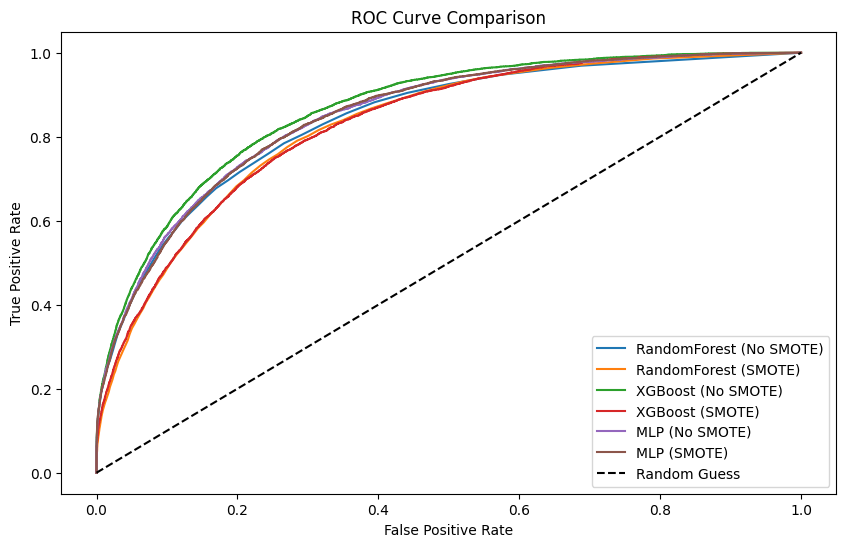

In [28]:
# ROC Curve Comparison
plt.figure(figsize=(10, 6))

for model_name, y_pred, y_prob in models_info:
    precision_val = classification_report(y_test, y_pred, output_dict=True)["1"]["precision"]
    recall_val    = classification_report(y_test, y_pred, output_dict=True)["1"]["recall"]
    f1_val        = classification_report(y_test, y_pred, output_dict=True)["1"]["f1-score"]
    roc_val       = roc_auc_score(y_test, y_prob)
    pr_val        = average_precision_score(y_test, y_prob)

    results.append({
        "Model": model_name,
        "Precision": precision_val,
        "Recall": recall_val,
        "F1": f1_val,
        "ROC AUC": roc_val,
        "PR AUC": pr_val
    })

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=model_name)

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

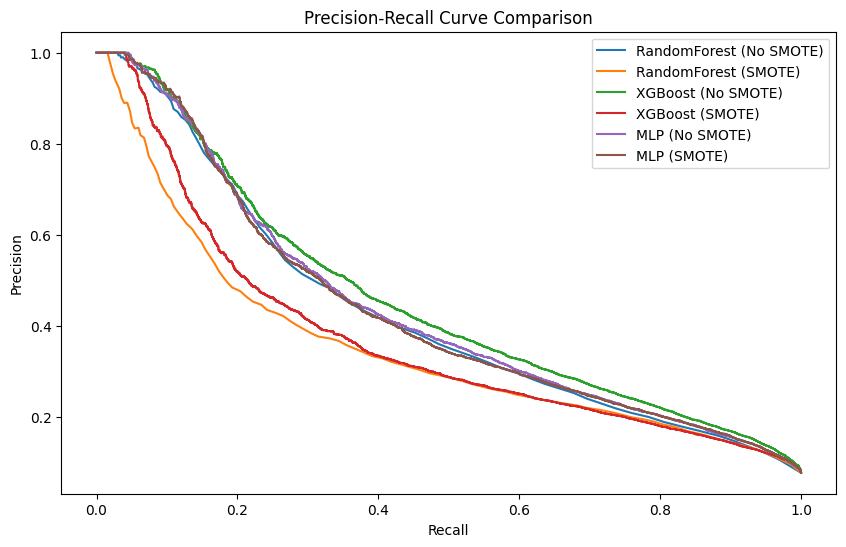

In [29]:
# Precision-Recall Curve Comparison
plt.figure(figsize=(10, 6))

for model_name, y_pred, y_prob in models_info:
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(recall_vals, precision_vals, label=model_name)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.show()